In [2]:
import tensorflow as tf

In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
tf.test.is_built_with_cuda()    # cuda is not installed

False

In [5]:
(x_train , y_train) , (x_test , y_test) = tf.keras.datasets.cifar10.load_data()

In [6]:
import matplotlib.pyplot as plt

In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
x_test.shape

(10000, 32, 32, 3)

In [9]:
y_train.shape

(50000, 1)

In [10]:
y_test.shape

(10000, 1)

In [11]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

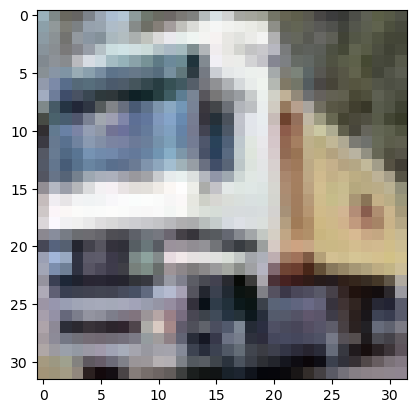

In [12]:
plt.imshow(x_train[1])

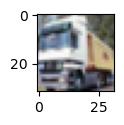

In [13]:
plt.figure(figsize=(10,1))      # it will used to reduce the size of the image
plt.imshow(x_train[1])
# plt.figure(figsize=(10,1))        if we are using down side it will not work

### we need to write the object list of  cifar10 in a correct list

In [14]:
classes = ["aeroplane","automobile","bird","cat","deer","dog","frog","horse","ship" , "truck"]

##  x_train 

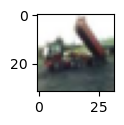

In [15]:
plt.figure(figsize=(10,1))
plt.imshow(x_train[2])

####  we need to use y_train for predection

In [16]:
y_train[2]

array([9], dtype=uint8)

In [17]:
classes[y_train[2][0]]          # [0] is compulsary

'truck'

## x_test 

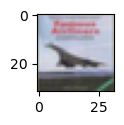

In [18]:
plt.figure(figsize=(10,1))
plt.imshow(x_test[3])

#### we need to use y_test for predection

In [19]:
y_test[3]

array([0], dtype=uint8)

In [20]:
classes[y_test[3][0]]

'aeroplane'

#  neural network 

###  if we want good accuracy then we should divide the value by maximum value

In [21]:
x_train.max()  # this is used to find the max value of the data

255

#####  The Minmaxscaller is used only when the datas are more than 2 datas , best example is available in customer_churn_predection

In [22]:
x_train = x_train/255
x_test  = x_test/255  # no need of y_train , y_test , because we need to train only x_train , x_test

In [23]:
from tensorflow import keras

In [24]:
x_train.shape

(50000, 32, 32, 3)

#  ANN

In [25]:
ann  = keras.Sequential([ 
    keras.layers.Flatten(input_shape =(32,32,3,)),
    keras.layers.Dense(2000, activation = 'relu'),
    keras.layers.Dense(1500, activation = 'relu'),
    keras.layers.Dense(1000, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid') ])

ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              
)

ann.fit(x_train , y_train , epochs=5)



Epoch 1/5


1563/1563 [==============================] - 213s 135ms/step - loss: 1.8925 - accuracy: 0.3107
Epoch 2/5
1563/1563 [==============================] - 208s 133ms/step - loss: 1.6969 - accuracy: 0.3888
Epoch 3/5
1563/1563 [==============================] - 207s 132ms/step - loss: 1.6183 - accuracy: 0.4168
Epoch 4/5
1563/1563 [==============================] - 208s 133ms/step - loss: 1.5601 - accuracy: 0.4358
Epoch 5/5
1563/1563 [==============================] - 206s 132ms/step - loss: 1.5162 - accuracy: 0.4555


In [130]:
ann.evaluate(x_test , y_test)

313/313 [==============================] - 5s 17ms/step - loss: 1.5280 - accuracy: 0.4588


[1.5280323028564453, 0.45879998803138733]

In [27]:
y_pred = ann.predict(x_test)

313/313 [==============================] - 3s 9ms/step


In [28]:
print(y_pred[:1])

[[0.5422833  0.31263712 0.45557186 0.74835604 0.31648913 0.70244926
  0.5004679  0.12013486 0.40172    0.16377822]]


In [29]:
y_test[:1]

array([[3]], dtype=uint8)

In [30]:
from sklearn.metrics import confusion_matrix , classification_report

In [31]:
import numpy as np

In [137]:
y_pred1 = [np.argmax(i) for i in  y_pred]

### confusion matrix 

In [138]:
cm = confusion_matrix(y_test ,y_pred1)
cm

array([[596,  19,  55,  28,  54,   9,  20,  18, 160,  41],
       [ 64, 517,  28,  31,  21,  16,   8,  15,  89, 211],
       [123,  23, 291,  95, 236,  42,  98,  46,  25,  21],
       [ 63,  21,  93, 355, 106, 106,  99,  30,  37,  90],
       [ 74,   8, 139,  71, 487,  15, 107,  53,  23,  23],
       [ 40,  13, 114, 248, 111, 272,  70,  53,  37,  42],
       [ 14,  24,  84, 137, 173,  28, 466,  15,  16,  43],
       [ 86,  11,  55,  85, 183,  49,  25, 414,  20,  72],
       [137,  54,  13,  35,  23,  18,   4,   9, 634,  73],
       [ 61, 156,   8,  43,  18,  10,  13,  31, 104, 556]], dtype=int64)

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

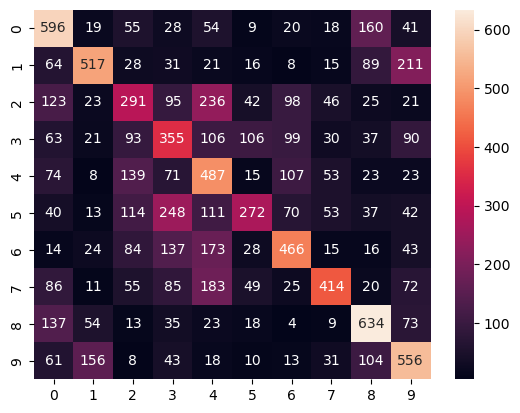

In [151]:
sns.heatmap(cm , annot=True  , fmt='d')

###  classification report

In [36]:
cr = classification_report(y_test , y_pred1)
print(cr)

              precision    recall  f1-score   support

           0       0.47      0.60      0.53      1000
           1       0.61      0.52      0.56      1000
           2       0.33      0.29      0.31      1000
           3       0.31      0.35      0.33      1000
           4       0.34      0.49      0.40      1000
           5       0.48      0.27      0.35      1000
           6       0.51      0.47      0.49      1000
           7       0.61      0.41      0.49      1000
           8       0.55      0.63      0.59      1000
           9       0.47      0.56      0.51      1000

    accuracy                           0.46     10000
   macro avg       0.47      0.46      0.46     10000
weighted avg       0.47      0.46      0.46     10000



# CNN

In [93]:
cnn = keras.Sequential([
    
    # CNN
    
#     keras.layers.Conv2D(filters=32 , kernel_size=(3,3) , activation= 'relu'),
#     keras.layers.MaxPooling2D(pool_size=(2,2)),
    
                             # OR
    
    keras.layers.Conv2D(32 , (3 , 3) , activation= 'relu' , input_shape = (32 , 32,3 ,)),   # imput_shape is one time enough
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3) , activation= 'relu'),  # we can write no.of layer we wish
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    
    #dnse

    keras.layers.Flatten(),          # noo need to add input_shape , it will take the above input_shape
    keras.layers.Dense(200 , activation='relu'),
    keras.layers.Dense(10 , activation='softmax'),      
    
])

In [94]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              
)

cnn.fit(x_train , y_train , epochs=10)

Epoch 1/10
1563/1563 [==============================] - 30s 18ms/step - loss: 1.3978 - accuracy: 0.4984
Epoch 2/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.0364 - accuracy: 0.6355
Epoch 3/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8808 - accuracy: 0.6926
Epoch 4/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.7672 - accuracy: 0.7330
Epoch 5/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.6706 - accuracy: 0.7659
Epoch 6/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.5791 - accuracy: 0.7986
Epoch 7/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.4952 - accuracy: 0.8270
Epoch 8/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.4240 - accuracy: 0.8508
Epoch 9/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.3539 - accuracy: 0.8768
Epoch 10/10
1563/1563 [==============================] - 27s 17m

In [95]:
cnn.evaluate(x_test , y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.1400 - accuracy: 0.6995


[1.1399967670440674, 0.6995000243186951]

In [131]:
y_pred2 = cnn.predict(x_test)

313/313 [==============================] - 3s 10ms/step


In [132]:
print(y_pred[:1])

[[2.2643935e-06 1.9373676e-09 1.6197652e-02 9.7752804e-01 7.6491946e-05
  2.5031526e-05 6.1671673e-03 2.2817202e-08 2.4504257e-06 1.0065640e-06]]


In [133]:
from sklearn.metrics import confusion_matrix , classification_report

In [140]:
y_pred3 = [np.argmax(i) for i in  y_pred2]

###  confusion matrix

In [154]:
cm1 = confusion_matrix(y_test , y_pred3)
print(cm1)

[[742  14  69  28  14   6  10   7  68  42]
 [ 21 775  10  17   3   5  13   3  34 119]
 [ 46   5 587  94  77  77  69  23  12  10]
 [ 17   7  61 576  46 167  68  32  12  14]
 [ 17   3  73  91 612  47  85  54  15   3]
 [ 13   2  53 208  44 604  24  37  11   4]
 [  4   8  41  74  26  17 807   4  13   6]
 [ 15   2  32  69  69  77  14 696   4  22]
 [ 59  35  17  30   6  11   8   2 796  36]
 [ 19  69   8  32   5  13   9  11  34 800]]


<Axes: >

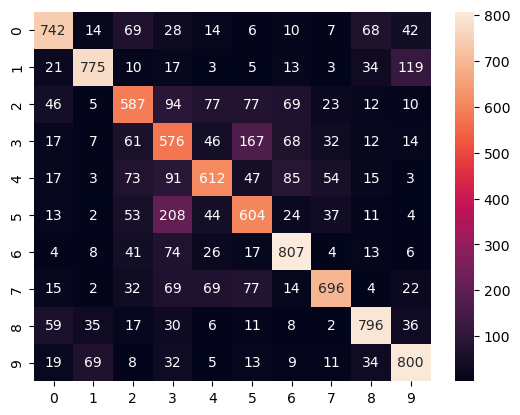

In [152]:
sns.heatmap(cm1 , annot=True , fmt='d')

###  classification report

In [146]:
cr1 = classification_report(y_test , y_pred3)
print(cr1)

              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1000
           1       0.84      0.78      0.81      1000
           2       0.62      0.59      0.60      1000
           3       0.47      0.58      0.52      1000
           4       0.68      0.61      0.64      1000
           5       0.59      0.60      0.60      1000
           6       0.73      0.81      0.77      1000
           7       0.80      0.70      0.74      1000
           8       0.80      0.80      0.80      1000
           9       0.76      0.80      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



###  predection

In [119]:
classes

['aeroplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [125]:
classes[:5]

['aeroplane', 'automobile', 'bird', 'cat', 'deer']

In [105]:
y_test = np.round(y_test)
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

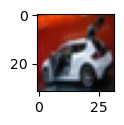

In [123]:
plt.figure(figsize=(20 , 1))
plt.imshow(x_test[6])

In [127]:
y_test[6]

array([1], dtype=uint8)

In [126]:
classes[y_test[6][0]]

'automobile'